In [7]:
import torch 
from torch.autograd import Variable
import torch.nn as nn

In [15]:
tensor = torch.FloatTensor ([[1,3,5],[2,4,6]])
variable = Variable (tensor, requires_grad=1)
v_out = torch.mean(variable*variable)
print (tensor)
print (variable.grad)

tensor([[1., 3., 5.],
        [2., 4., 6.]])
None


'GeForce MX250'

In [9]:
variable.grad # 1/n*variable

In [10]:
# regression

import torch.nn.functional as F

x = torch.unsqueeze (torch.linspace(-1,1,50), dim=1)
y = x.pow(2)+0.15*torch.rand(x.size())

class Net (torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear (n_feature, n_hidden)
        self.predict = torch.nn.Linear (n_hidden, n_output)
        
    def forward (self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

redct = Net(n_feature=1, n_hidden=10, n_output=1)
optimizer = torch.optim.SGD(redct.parameters(), lr=0.1)
loss_func = torch.nn.MSELoss()

for i in range (150):
    
    prediction = redct(x)
    loss = loss_func (prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%10 == 0:
        print (loss)

tensor(0.2721, grad_fn=<MseLossBackward>)
tensor(0.0615, grad_fn=<MseLossBackward>)
tensor(0.0568, grad_fn=<MseLossBackward>)
tensor(0.0527, grad_fn=<MseLossBackward>)
tensor(0.0487, grad_fn=<MseLossBackward>)
tensor(0.0447, grad_fn=<MseLossBackward>)
tensor(0.0409, grad_fn=<MseLossBackward>)
tensor(0.0372, grad_fn=<MseLossBackward>)
tensor(0.0336, grad_fn=<MseLossBackward>)
tensor(0.0303, grad_fn=<MseLossBackward>)
tensor(0.0272, grad_fn=<MseLossBackward>)
tensor(0.0243, grad_fn=<MseLossBackward>)
tensor(0.0218, grad_fn=<MseLossBackward>)
tensor(0.0195, grad_fn=<MseLossBackward>)
tensor(0.0175, grad_fn=<MseLossBackward>)


In [11]:
#  classification

n_data = torch.ones (100,2)
x_0 = torch.normal(2*n_data, 1)
y_0 = torch.zeros(100)
x_1 = torch.normal(-2*n_data, 1)
y_1 = torch.ones (100)

x = torch.cat((x_0, x_1), 0).type(torch.FloatTensor)
y = torch.cat((y_0, y_1), ).type(torch.LongTensor)

x,y = Variable (x), Variable (y)

class Net (torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super().__init__()
        self.hidden = torch.nn.Linear (n_feature, n_hidden)
        self.out = torch.nn.Linear (n_hidden, n_output)
        
    def forward (self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
    
clas = Net (n_feature=2, n_hidden=10, n_output=2)
optimizer = torch.optim.SGD(clas.parameters(), lr=0.05)
loss_func = torch.nn.CrossEntropyLoss()

for i in range (100):
    out = clas(x)
    loss = loss_func(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i%10==0:
        print (loss)

tensor(0.4693, grad_fn=<NllLossBackward>)
tensor(0.2082, grad_fn=<NllLossBackward>)
tensor(0.1280, grad_fn=<NllLossBackward>)
tensor(0.0912, grad_fn=<NllLossBackward>)
tensor(0.0706, grad_fn=<NllLossBackward>)
tensor(0.0577, grad_fn=<NllLossBackward>)
tensor(0.0488, grad_fn=<NllLossBackward>)
tensor(0.0424, grad_fn=<NllLossBackward>)
tensor(0.0375, grad_fn=<NllLossBackward>)
tensor(0.0337, grad_fn=<NllLossBackward>)


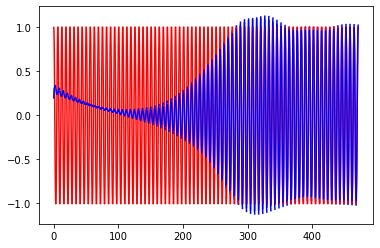

In [12]:
import numpy as np
import matplotlib.pyplot as plt

class RNN (nn.Module):
    def __init__(self):
        super().__init__()
        
        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,
            num_layers=1,
            batch_first=True,
        )
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs,dim=1), h_state
    
rnn = RNN()
optimizer = torch.optim.Adam(rnn.parameters(), lr=5E-4)
loss_func = nn.MSELoss ()
h_state = None

for step in range (150):
    
    start, end = step*np.pi, (step+1)*np.pi
    steps = np.linspace (start, end, 10, dtype=np.float32)
    
    x_np = np.sin (steps)
    y_np = np.cos (steps)
    
    x = Variable (torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))
    y = Variable (torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    pre, h_state = rnn(x, h_state)
    h_state = Variable (h_state.data)
    
    loss = loss_func(pre, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, pre.data.numpy().flatten(), 'b-')
plt.draw()